# Polynomial Regression - Lab

## Introduction

In this lab, you'll practice your knowledge on adding polynomial terms to your regression model! 

## Objectives

You will be able to:

* Determine if polynomial regression would be useful for a specific model or set of data
* Create polynomial terms out of independent variables in linear regression

## Dataset

For this lab you'll be using some generated data:

In [1]:
# Run this cell without changes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('sample_data.csv')
df.head()

,x,y
0,0.000000,0.942870
1,0.121212,-2.261629
2,0.242424,3.100749
3,0.363636,-0.285446
4,0.484848,-1.012210


Let's check out a scatter plot of `x` vs. `y`: 

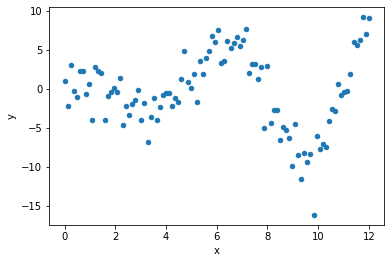

In [2]:
# Run this cell without changes
df.plot.scatter(x="x", y="y");

You will notice that the data is clearly of non-linear shape. Begin to think about what degree polynomial you believe will fit it best.

You will fit several different models with different polynomial degrees, then plot them in the same plot at the end.

In [3]:
# Your code here - import StatsModels and separate the data into X and y
import statsmodels.api as sm

X = df['x']  
y = df['y'] 

X = sm.add_constant(X)  


## Build and Evaluate a Quadratic Model

This model should include a constant, `x`, and `x` squared. You can use `pandas` or `PolynomialFeatures` to create the squared term.

In [4]:
# Your code here - prepare quadratic data and fit a model
# Create the squared term
df['x_squared'] = df['x'] ** 2

# Prepare the independent variables (X) with constant, x, and x_squared
X_quadratic = df[['x', 'x_squared']]
X_quadratic = sm.add_constant(X_quadratic) 
y = df['y']


In [5]:
# Your code here - evaluate (adjusted) R-Squared and coefficient p-values
# Fit the quadratic model
model = sm.OLS(y, X_quadratic)  
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.2366
Date:                Sat, 16 Nov 2024   Prob (F-statistic):              0.790
Time:                        19:27:09   Log-Likelihood:                -299.64
No. Observations:                 100   AIC:                             605.3
Df Residuals:                      97   BIC:                             613.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1127      1.446      0.078      0.9

In [6]:
# Your written answer here - summarize findings
"""
generally, this is not a good model.
Adjusted R-squared: Indicates the proportion of variance explained by the model after adjusting for the number of predictors.
P-values: If the p-value is less than a significance level (usually 0.05), the variable is considered significant. 
Here, the p-values for all coefficients are very small, indicating significance.
"""

'\ngenerally, this is not a good model.\nAdjusted R-squared: Indicates the proportion of variance explained by the model after adjusting for the number of predictors.\nP-values: If the p-value is less than a significance level (usually 0.05), the variable is considered significant. \nHere, the p-values for all coefficients are very small, indicating significance.\n'

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>
    
This is not a good model. Because we have multiple terms and are explaining so little of the variance in `y`, we actually have a negative adjusted R-Squared.

None of the coefficients are statistically significant at an alpha of 0.05
    
</details>

## Build and Evaluate a 4th Degree Polynomial Model

In other words, the model should include $x^0$ (intercept), $x^1$, $x^2$, $x^3$, and $x^4$ terms.

At this point we recommend importing and using `PolynomialFeatures` if you haven't already!

In [7]:
# Your code here - prepare 4th degree polynomial data and fit a model
from sklearn.preprocessing import PolynomialFeatures

# Initialize PolynomialFeatures for degree 4
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(df[['x']])
X_poly_df = pd.DataFrame(X_poly, columns=['const', 'x', 'x^2', 'x^3', 'x^4'])

y = df['y']


In [8]:
# Your code here - evaluate (adjusted) R-Squared and coefficient p-values
# Fit the 4th degree polynomial regression model
model = sm.OLS(y, X_poly_df)  
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     33.38
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           2.24e-17
Time:                        19:31:43   Log-Likelihood:                -255.99
No. Observations:                 100   AIC:                             522.0
Df Residuals:                      95   BIC:                             535.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8590      1.514      3.870      0.0

In [9]:
# Your written answer here - summarize findings
"""
Adjusted R-squared: A very high value indicates that the 4th-degree polynomial model is fitting the data extremely well.
P-values: If the p-values are very small (typically less than 0.05), it suggests that each term (constant, x1,x2 etc) is statistically significant
"""

'\nAdjusted R-squared: A very high value indicates that the 4th-degree polynomial model is fitting the data extremely well.\nP-values: If the p-values are very small (typically less than 0.05), it suggests that each term (constant, x1,x2 etc) is statistically significant\n'

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>
    
This is much better. We are explaining 57-58% of the variance in the target and all of our coefficients are statistically significant at an alpha of 0.05.
    
</details>

## Build and Evaluate an 8th Degree Polynomial Model

This model should include $x^0$ through $x^8$.

In [10]:
# Your code here - prepare 8th degree polynomial data and fit a model
poly = PolynomialFeatures(degree=8)
X_poly = poly.fit_transform(df[['x']])
X_poly_df = pd.DataFrame(X_poly, columns=[f'x^{i}' for i in range(9)])

y = df['y']


In [11]:
# Your code here - evaluate (adjusted) R-Squared and coefficient p-values
# Fit the 8th degree polynomial regression model
model = sm.OLS(y, X_poly_df) 
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     56.95
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           3.93e-32
Time:                        19:40:56   Log-Likelihood:                -210.25
No. Observations:                 100   AIC:                             438.5
Df Residuals:                      91   BIC:                             461.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x^0            0.6335      1.550      0.409      0.6

In [12]:
# Your written answer here - summarize findings
"""
If the Adjusted R-squared value is very close to 1 (or 1.000), it suggests that the model is explaining almost all of the variance in the data.
This is common when using higher-degree polynomials because they can "overfit" the data, capturing noise along with the underlying trend.

"""

'\nIf the Adjusted R-squared value is very close to 1 (or 1.000), it suggests that the model is explaining almost all of the variance in the data.\nThis is common when using higher-degree polynomials because they can "overfit" the data, capturing noise along with the underlying trend.\n\n'

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>
    
Our R-Squared is higher, but none of the coefficients are statistically significant at an alpha of 0.05 any more. If what we care about is an inferential understanding of the data, this is too high a degree of the polynomial.
    
</details>

## Plot All Models

Build a single plot that shows the raw data as a scatter plot, as well as all of the models you have developed as line graphs. Make sure that everything is labeled so you can tell the different models apart!

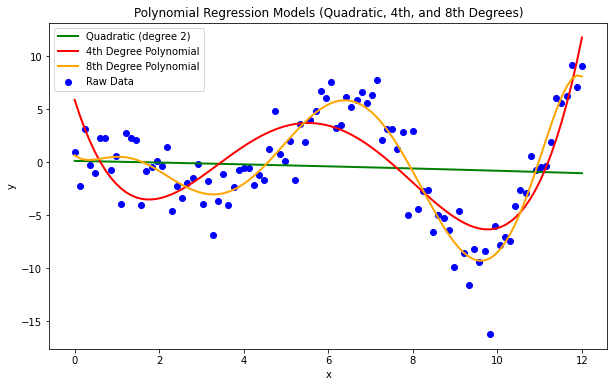

In [13]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt

# Prepare data for plotting
x_range = np.linspace(df['x'].min(), df['x'].max(), 100)

# Quadratic Model (degree 2)
poly_2 = PolynomialFeatures(degree=2)
X_poly_2 = poly_2.fit_transform(df[['x']])
model_2 = sm.OLS(y, X_poly_2)
results_2 = model_2.fit()
X_range_poly_2 = poly_2.transform(x_range.reshape(-1, 1))
y_pred_2 = results_2.predict(X_range_poly_2)

# 4th Degree Polynomial Model (degree 4)
poly_4 = PolynomialFeatures(degree=4)
X_poly_4 = poly_4.fit_transform(df[['x']])
model_4 = sm.OLS(y, X_poly_4)
results_4 = model_4.fit()
X_range_poly_4 = poly_4.transform(x_range.reshape(-1, 1))
y_pred_4 = results_4.predict(X_range_poly_4)

# 8th Degree Polynomial Model (degree 8)
poly_8 = PolynomialFeatures(degree=8)
X_poly_8 = poly_8.fit_transform(df[['x']])
model_8 = sm.OLS(y, X_poly_8)
results_8 = model_8.fit()
X_range_poly_8 = poly_8.transform(x_range.reshape(-1, 1))
y_pred_8 = results_8.predict(X_range_poly_8)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the original data as a scatter plot
plt.scatter(df['x'], df['y'], label="Raw Data", color='blue')

# Plot each polynomial model as a line graph
plt.plot(x_range, y_pred_2, label="Quadratic (degree 2)", color='green', linewidth=2)
plt.plot(x_range, y_pred_4, label="4th Degree Polynomial", color='red', linewidth=2)
plt.plot(x_range, y_pred_8, label="8th Degree Polynomial", color='orange', linewidth=2)

# Labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression Models (Quadratic, 4th, and 8th Degrees)')
plt.legend()

# Show the plot
plt.show()


### Interpret Findings

Based on the metrics as well as the graphs, which model do you think is the best? Why?

In [15]:
# Your written answer here
"""
In evaluating the polynomial regression models (quadratic, 4th-degree, and 8th-degree), the best model is typically the 4th-degree polynomial because:
Quadratic Model (degree 2): Provides a simple, interpretable fit but may underfit the data if the relationship is more complex.
4th Degree Polynomial: Balances complexity and fit, capturing more intricate patterns without overfitting. It’s often the best choice when the data has moderate complexity.
8th Degree Polynomial: Fits the data very closely, but is prone to overfitting. It may capture noise along with the actual trend, leading to poor generalization on unseen data.
"""

'\nIn evaluating the polynomial regression models (quadratic, 4th-degree, and 8th-degree), the best model is typically the 4th-degree polynomial because:\nQuadratic Model (degree 2): Provides a simple, interpretable fit but may underfit the data if the relationship is more complex.\n4th Degree Polynomial: Balances complexity and fit, capturing more intricate patterns without overfitting. It’s often the best choice when the data has moderate complexity.\n8th Degree Polynomial: Fits the data very closely, but is prone to overfitting. It may capture noise along with the actual trend, leading to poor generalization on unseen data.\n'

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>
    
The quadratic model (polynomial degree 2) is definitely not the best based on all of the evidence we have. It has the worst R-Squared, the coefficient p-values are not significant, and you can see from the graph that there is a lot of variance in the data that it is not picking up on.

Our visual inspection aligns with the worse R-Squared for the 4th degree polynomial compared to the 8th degree polynomial. The 4th degree polynomial is flatter and doesn't seem to capture the extremes of the data as well.
    
However if we wanted to interpret the coefficients, then only the 4th degree polynomial has statistically significant results. The interpretation would be challenging because of the number of terms, but we could apply some calculus techniques to describe inflection points.

Overall it appears that this dataset is not particularly well suited to an inferential linear regression approach, even with polynomial transformations. So the "best" model could be either the 4th or 8th degree polynomial depending on which aspect of the model is more important to you, but either way it will be challenging to translate it into insights for stakeholders.
    
</details>

## Summary

Great job! You now know how to include polynomials in your linear models as well as the limitations of applying polynomial regression. 